In [1]:
%matplotlib inline

import calendar
from datetime import date, timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('seaborn')
pd.options.display.max_rows = 65
pd.options.display.max_columns = 65

df = pd.concat([pd.read_csv(f'C:/Users/Serphone/Data/OCR_DS_P4/2016_{x:0>2d}.csv') for x in range(1, 13)])
df.reset_index(drop=True, inplace=True)

df.shape

c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(5617658, 65)

## Vue d'ensemble

In [2]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [3]:
df.sample(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
4925081,2016,4,11,29,2,2016-11-29,WN,19393,WN,N946WN,2804,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,14831,1483104,32457,SJC,"San Jose, CA",CA,6,California,91,1445,1454.0,9.0,9.0,0.0,0.0,1400-1459,13.0,1507.0,1604.0,4.0,1600,1608.0,8.0,8.0,0.0,0.0,1600-1659,0.0,NaN,0.0,75.0,74.0,57.0,1.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5335716,2016,4,12,4,7,2016-12-04,AA,19805,AA,N886AA,2471,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6,California,91,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,2155,2157.0,2.0,2.0,0.0,0.0,2100-2159,18.0,2215.0,543.0,11.0,552,554.0,2.0,2.0,0.0,0.0,0001-0559,0.0,NaN,0.0,297.0,297.0,268.0,1.0,2342.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2070791,2016,2,5,14,6,2016-05-14,NK,20416,NK,N645NK,209,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,13796,1379604,32457,OAK,"Oakland, CA",CA,6,California,91,1331,1324.0,-7.0,0.0,0.0,-1.0,1300-1359,10.0,1334.0,1555.0,5.0,1608,1600.0,-8.0,0.0,0.0,-1.0,1600-1659,0.0,NaN,0.0,277.0,276.0,261.0,1.0,1836.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347058,2016,1,3,1,2,2016-03-01,DL,19790,DL,N997DL,781,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1200,1200.0,0.0,0.0,0.0,0.0,1200-1259,41.0,1241.0,1436.0,7.0,1500,1443.0,-17.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,180.0,163.0,115.0,1.0,762.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5438460,2016,4,12,18,7,2016-12-18,EV,20366,EV,N744EV,5208,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,2236,32.0,116.0,116.0,1.0,7.0,2200-2259,15.0,47.0,143.0,3.0,2359,146.0,107.0,107.0,1.0,7.0,2300-2359,0.0,NaN,0.0,83.0,74.0,56.0,1.0,399.0,2,107.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,5.61766e+06,NaN,NaN,NaN,2016,0,2016,2016,2016,2016,2016
QUARTER,5.61766e+06,NaN,NaN,NaN,2.51193,1.10589,1,2,3,3,4
MONTH,5.61766e+06,NaN,NaN,NaN,6.53581,3.40085,1,4,7,9,12
DAY_OF_MONTH,5.61766e+06,NaN,NaN,NaN,15.7774,8.78984,1,8,16,23,31
DAY_OF_WEEK,5.61766e+06,NaN,NaN,NaN,3.93391,1.9855,1,2,4,6,7
FL_DATE,5617658,366,2016-11-27,17065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIQUE_CARRIER,5617658,12,WN,1299444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIRLINE_ID,5.61766e+06,NaN,NaN,NaN,19902,380.817,19393,19790,19805,20304,21171
CARRIER,5617658,12,WN,1299444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,5604766,5035,N491HA,3937,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Suppression des vols annulés ou déroutés
df = df[(df.CANCELLED == 0) & (df.DIVERTED == 0)]
df.shape

(5538145, 65)

## Selection des features utiles

In [6]:
df = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 
         'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 
         'CRS_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'ARR_DELAY']]

In [7]:
df.nunique()

MONTH                  12
DAY_OF_MONTH           31
DAY_OF_WEEK             7
FL_DATE               366
UNIQUE_CARRIER         12
ORIGIN_AIRPORT_ID     311
DEST_AIRPORT_ID       310
CRS_DEP_TIME         1334
CRS_ARR_TIME         1439
CRS_ELAPSED_TIME      574
DISTANCE             1348
DISTANCE_GROUP         11
ARR_DELAY            1387
dtype: int64

In [8]:
col_info = pd.concat([df.dtypes, 
                      df.isnull().sum(),
                      (1 - (df.isnull().sum() / df.shape[0])) * 100], 
                     axis=1)

col_info.columns = ['type', 'null values', 'filling factor (%)']
col_info.sort_values('null values', ascending=False)

,type,null values,filling factor (%)
MONTH,int64,0,100.0
DAY_OF_MONTH,int64,0,100.0
DAY_OF_WEEK,int64,0,100.0
FL_DATE,object,0,100.0
UNIQUE_CARRIER,object,0,100.0
ORIGIN_AIRPORT_ID,int64,0,100.0
DEST_AIRPORT_ID,int64,0,100.0
CRS_DEP_TIME,int64,0,100.0
CRS_ARR_TIME,int64,0,100.0
CRS_ELAPSED_TIME,float64,0,100.0


## Nouvelles features

### Nombre de jours avant vacances

In [9]:
holidays = [date(2016, 1, 1), date(2016, 1, 18), date(2016, 2, 15), date(2016, 5, 30), date(2016, 7, 4),
            date(2016, 9, 5), date(2016, 10, 10), date(2016, 11, 11), date(2016, 11, 24), date(2016, 12, 26),
            date(2017, 1, 1)]

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
# Build a hash table to speed up the feature creation
# It's quickier to calculate only 365 times and then have lookups
# rather than calculate for 5+ millions rows
hash_days = dict()
for single_date in daterange(date(2016, 1, 1), date(2017, 1, 1)):
    closest_holiday = 366
    for holiday in holidays:
        closest_holiday = min(closest_holiday, abs((single_date - holiday).days))
    hash_days[single_date] = closest_holiday
    
df['DAYS_TO_HOLIDAY'] = df['FL_DATE'].apply(lambda x: hash_days[date(int(x[:4]), int(x[5:7]), int(x[8:]))])

### Heures de départ et d'arrivée par tranche horaire

In [10]:
df['DEP_HOUR'] = df['CRS_DEP_TIME'].apply(lambda x: x // 100)
df['ARR_HOUR'] = df['CRS_ARR_TIME'].apply(lambda x: x // 100)

In [11]:
df.sample(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,ARR_DELAY,DAYS_TO_HOLIDAY,DEP_HOUR,ARR_HOUR
5505008,12,1,4,2016-12-01,WN,14869,11292,700,840,100.0,391.0,2,-23.0,7,7,8
2177034,5,27,5,2016-05-27,AA,14679,12478,740,1607,327.0,2446.0,10,11.0,3,7,16
2620046,6,22,3,2016-06-22,UA,12266,14908,900,1030,210.0,1346.0,6,36.0,12,9,10
1318777,3,29,2,2016-03-29,AS,14747,13796,1030,1230,120.0,672.0,3,29.0,43,10,12
4877013,11,17,4,2016-11-17,WN,14107,14893,550,650,120.0,647.0,3,7.0,6,5,6


## Analyse exploratoire

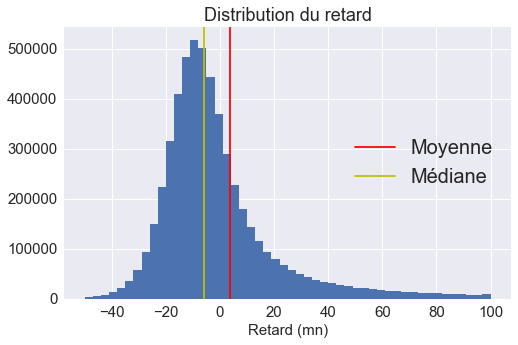

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['ARR_DELAY'], bins=50, range=(-50, 100))
line1 = ax.axvline(x=df.ARR_DELAY.mean(), color='r')
line2 = ax.axvline(x=df.ARR_DELAY.median(), color='y')
ax.set_title("Distribution du retard", size=18)
ax.set_xlabel("Retard (mn)", size=15)
ax.tick_params(labelsize=15)

ax.legend(handles=(line1, line2), labels=('Moyenne', 'Médiane'), fontsize=20, loc='center right')
plt.show()

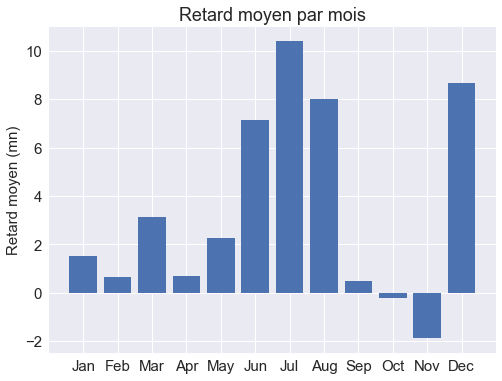

In [13]:
grouped = df.groupby(by='MONTH')
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=[calendar.month_abbr[x] for x in grouped.mean().index])
ax.set_title("Retard moyen par mois", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.tick_params(labelsize=15)

plt.show()

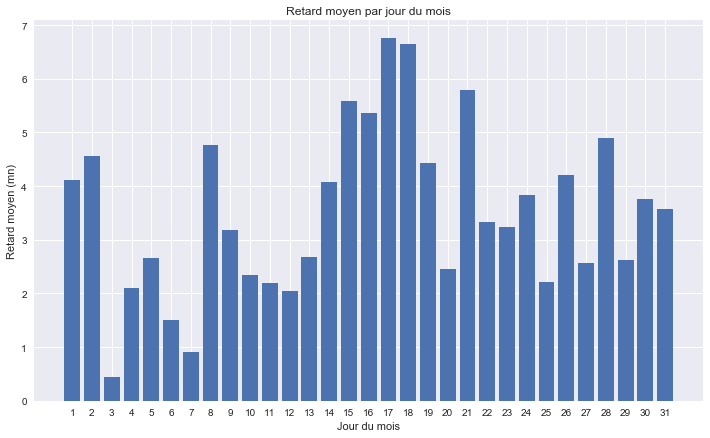

In [14]:
grouped = df.groupby(by='DAY_OF_MONTH')
    
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=grouped.mean().index)
ax.set_title("Retard moyen par jour du mois")
ax.set_ylabel("Retard moyen (mn)")
ax.set_xlabel("Jour du mois")

plt.show()

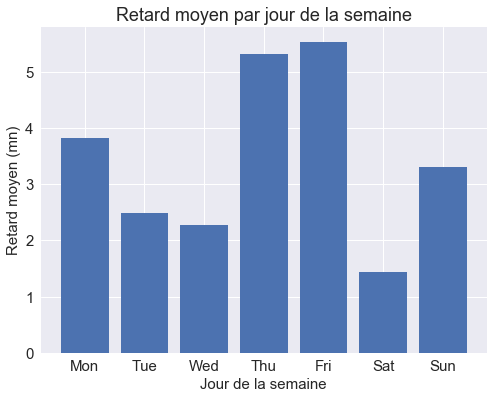

In [15]:
grouped = df.groupby(by='DAY_OF_WEEK')
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=[calendar.day_abbr[x-1] for x in grouped.mean().index])
ax.set_title("Retard moyen par jour de la semaine", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.set_xlabel("Jour de la semaine", size=15)
ax.tick_params(labelsize=15)

plt.show()

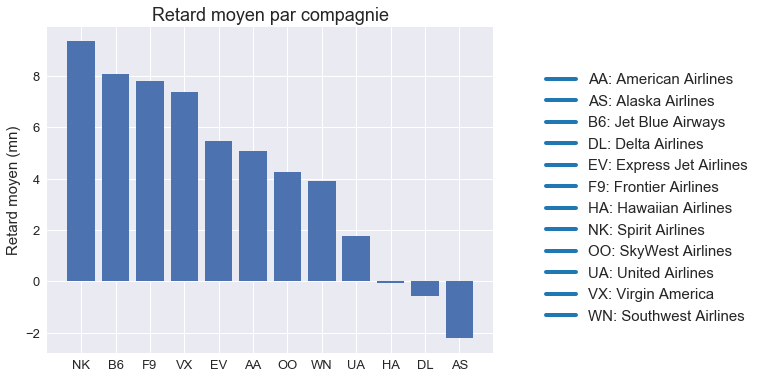

In [16]:


airlines = {
    'AA': 'American Airlines', 'AS': 'Alaska Airlines', 'B6': 'Jet Blue Airways',
    'DL': 'Delta Airlines', 'EV': 'Express Jet Airlines', 'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines', 'NK': 'Spirit Airlines', 'OO': 'SkyWest Airlines',
    'UA': 'United Airlines', 'VX': 'Virgin America', 'WN': 'Southwest Airlines'
}

grouped = df.groupby(by='UNIQUE_CARRIER')
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.ARR_DELAY.mean().sort_values(ascending=False),
       tick_label=grouped.ARR_DELAY.mean().sort_values(ascending=False).index)
ax.set_title("Retard moyen par compagnie", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.tick_params(labelsize=13)

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label=f'{k}: {v}') for k, v in airlines.items()]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.6, 0.9), prop={'size': 15})

plt.show()

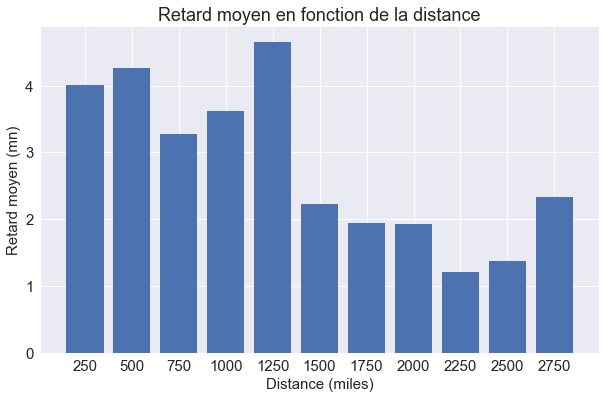

In [17]:
grouped = df.groupby(by='DISTANCE_GROUP')
    
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=grouped.mean().index*250)
ax.set_title("Retard moyen en fonction de la distance", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.set_xlabel("Distance (miles)", size=15)
ax.tick_params(labelsize=15)

plt.show()

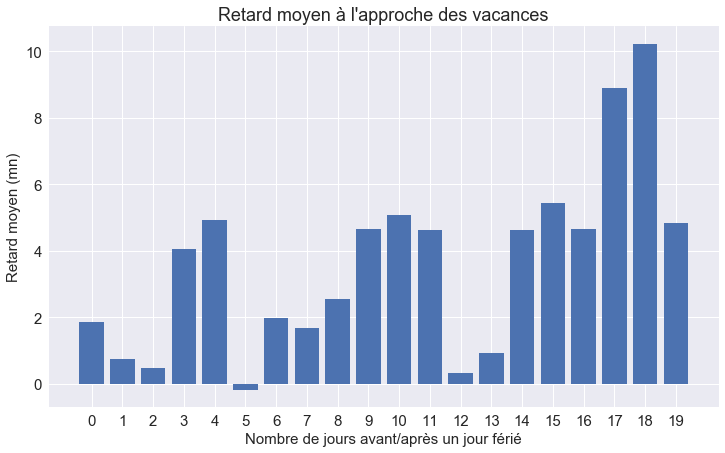

In [18]:
grouped = df.groupby(by='DAYS_TO_HOLIDAY')
    
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=np.arange(20), 
       height=grouped.mean()['ARR_DELAY'][:20],
       tick_label=grouped.mean().index[:20])
ax.set_title("Retard moyen à l'approche des vacances", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.set_xlabel("Nombre de jours avant/après un jour férié", size=15)
ax.tick_params(labelsize=15)

plt.show()

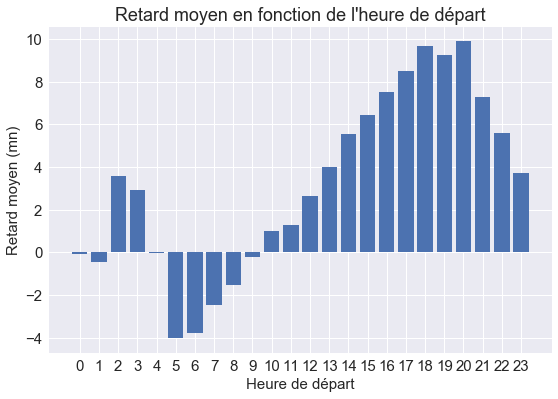

In [19]:
grouped = df.groupby(by='DEP_HOUR')
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=grouped.mean().index)
ax.set_title("Retard moyen en fonction de l'heure de départ", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.set_xlabel("Heure de départ", size=15)
ax.tick_params(labelsize=15)

plt.show()

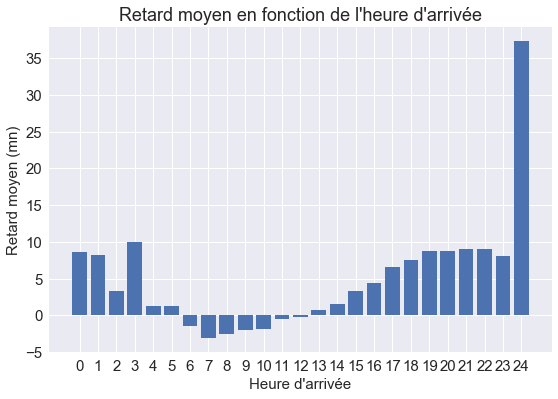

In [20]:
grouped = df.groupby(by='ARR_HOUR')
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x=np.arange(len(grouped)), 
       height=grouped.mean()['ARR_DELAY'],
       tick_label=grouped.mean().index)
ax.set_title("Retard moyen en fonction de l'heure d'arrivée", size=18)
ax.set_ylabel("Retard moyen (mn)", size=15)
ax.set_xlabel("Heure d'arrivée", size=15)
ax.tick_params(labelsize=15)

plt.show()

## Drop columns and separate dataset by carriers

In [21]:
# Convert HHMM timestamps to minutes only
df['CRS_DEP_TIME'] = (df.CRS_DEP_TIME // 100) * 60 + (df.CRS_DEP_TIME % 100)
df['CRS_ARR_TIME'] = (df.CRS_ARR_TIME // 100) * 60 + (df.CRS_ARR_TIME % 100)

# Drop not used columns
df.drop(['DISTANCE_GROUP','DEP_HOUR', 'ARR_HOUR', 'DAYS_TO_HOLIDAY', 'DISTANCE'], axis=1, inplace=True)

In [22]:
for carrier in df.UNIQUE_CARRIER.unique():
    temp = df[df.UNIQUE_CARRIER == carrier].drop(['UNIQUE_CARRIER'], axis=1)
    temp.to_csv(f'C:/Users/Serphone/Data/OCR_DS_P4/AIRLINE_DATASETS/{carrier}.csv',
                index=False)

## Export airlines and airports tables for the API

In [23]:
carriers = pd.read_csv('./L_UNIQUE_CARRIERS.csv', index_col=0)
airports = pd.read_csv('./L_AIRPORT_ID.csv', index_col=0)

airlines_table = {}
origin_airports_table = {}
dest_airports_table = {}

for airline in df.UNIQUE_CARRIER.unique():
    airlines_table[airline] = carriers.loc[airline].values[0]
with open('./carriers.pickle', 'wb') as f:
    pickle.dump(airlines_table, f)
    
for airport in df.ORIGIN_AIRPORT_ID.unique():
    origin_airports_table[airport] = airports.loc[airport].values[0]
with open('./origin_airports.pickle', 'wb') as f:
    pickle.dump(origin_airports_table, f)
    
for airport in df.DEST_AIRPORT_ID.unique():
    dest_airports_table[airport] = airports.loc[airport].values[0]
with open('./dest_airports.pickle', 'wb') as f:
    pickle.dump(dest_airports_table, f)